In [2]:
import numpy as np
import re
from numpy import genfromtxt


original = open("podatki/napake.csv", "r", encoding="utf8")
    
copy = open("podatki/napake2.csv", "w", encoding="utf8")
lines = original.readlines()
for line in lines:
    copy.write(re.sub(r'(?!(([^"]*"){2})*[^"]*$);', ',', line))
copy.close()
original.close()

In [3]:
import numpy as np
import re

tipVozila = dict()
vrstaNapake = dict()

f =  open("podatki/napake2.csv", "r", encoding="utf8")
f.readline()
for line in f:
    line = line.split(";")
    tipVozila.setdefault(line[1].replace('"', ''), 0)
    tipVozila[line[1].replace('"', '')] += 1
    vrstaNapake.setdefault(line[9].replace('"', ''), 0)
    vrstaNapake[line[9].replace('"', '')] += 1
#print(tipVozila)
#print(vrstaNapake)
f.close()

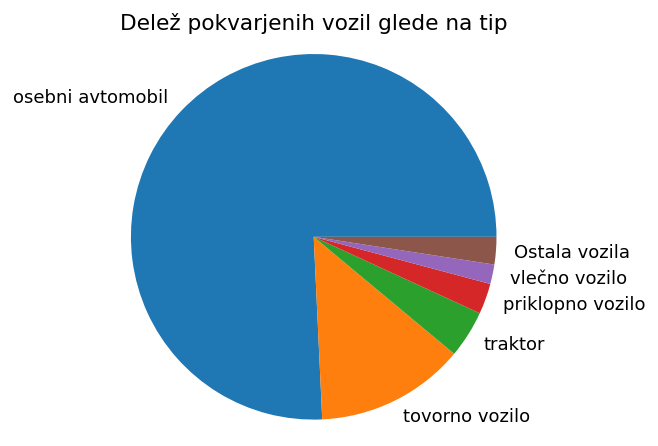

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

tip=[]
stevilo=[]
tipVozila["Ostala vozila"] = 0
for tip2, stevilo2 in tipVozila.items():
    if stevilo2 < 5000:
        tipVozila["Ostala vozila"] += stevilo2
    else:
        tip.append(tip2.replace('"', ''))
        stevilo.append(stevilo2)

figure(figsize=(4, 4), dpi=130)
plt.pie(stevilo, labels=tip)

plt.axis('equal')
plt.title("Delež pokvarjenih vozil glede na tip")
plt.show()

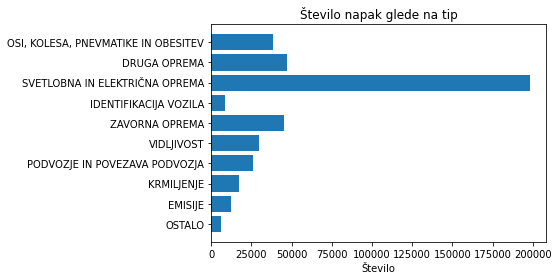

In [5]:

tip=[]
stevilo=[]
vrstaNapake["OSTALO"] = 0
for tip2, stevilo2 in vrstaNapake.items():
    if stevilo2 < 5000:
        vrstaNapake["OSTALO"] += stevilo2
    elif tip2 != "OSTALO":
        tip.append(tip2.replace('"', ''))
        stevilo.append(stevilo2)
tip.append("OSTALO")
stevilo.append(vrstaNapake["OSTALO"])

        
fig, ax = plt.subplots()
y_pos = np.arange(len(tip))
ax.barh(y_pos, stevilo, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(tip)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Število')
ax.set_title('Število napak glede na tip')
plt.show()

Vidimo, da imajo vozila v večini primerov težave z svetlobno in električno opremo

In [6]:
voziloNapaka = dict()
voziloNapaka.setdefault("OSTALA VOZILA", dict())
f =  open("podatki/napake2.csv", "r", encoding="utf8")
f.readline()

for line in f:
    line = line.split(";")
    if tipVozila[line[1].replace('"', '')] > 5000:
        voziloNapaka.setdefault(line[1].replace('"', ''), dict())
    else:
        voziloNapaka.setdefault("OSTALA VOZILA", dict())
    if vrstaNapake[line[9].replace('"', '')] > 5000:
        if tipVozila[line[1].replace('"', '')] > 5000:
            voziloNapaka[line[1].replace('"', '')].setdefault(line[9].replace('"', ''), 0)
            voziloNapaka[line[1].replace('"', '')][line[9].replace('"', '')] += 1
        else:
            voziloNapaka["OSTALA VOZILA"].setdefault(line[9].replace('"', ''), 0)
            voziloNapaka["OSTALA VOZILA"][line[9].replace('"', '')] += 1
    else:
        if tipVozila[line[1].replace('"', '')] > 5000:
            voziloNapaka[line[1].replace('"', '')].setdefault("OSTALE NAPAKE", 0)
            voziloNapaka[line[1].replace('"', '')]["OSTALE NAPAKE"] += 1
        else:
            voziloNapaka["OSTALA VOZILA"].setdefault("OSTALE NAPAKE", 0)
            voziloNapaka["OSTALA VOZILA"]["OSTALE NAPAKE"] += 1 

f.close()

<Figure size 432x288 with 0 Axes>

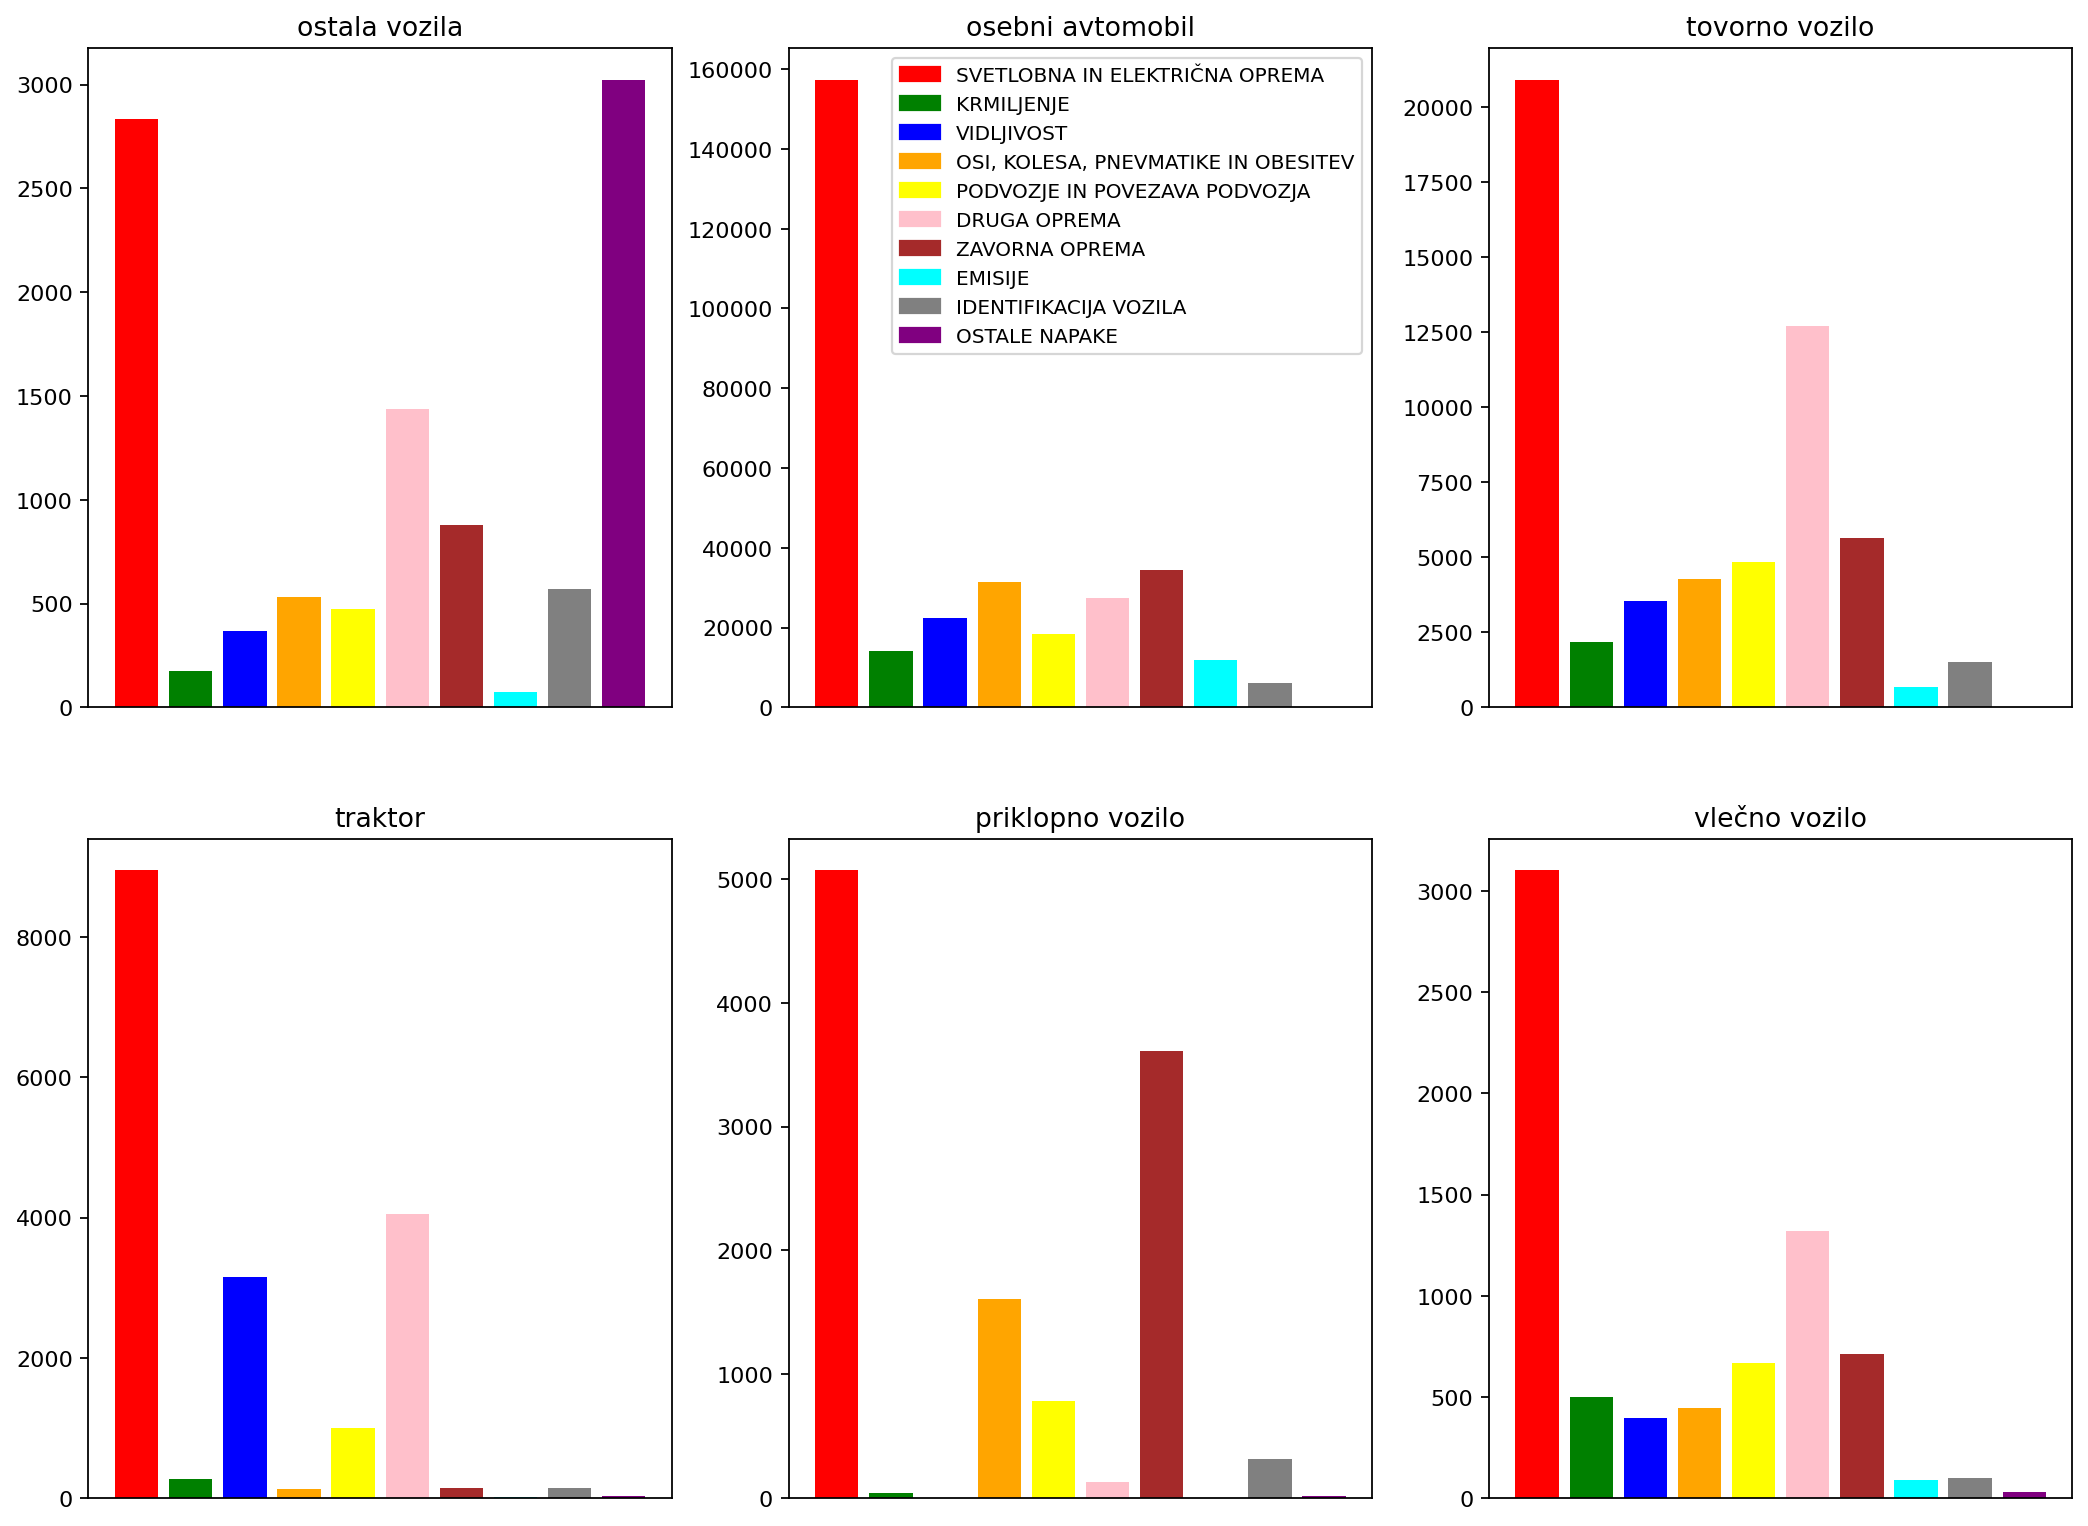

'\nhandles = [plt.Rectangle((0,0),1,1, color=barve[ti]) for ti in tip]\nplt.legend(handles, tip)\nplt.xticks([])\nax.bar(tip,stevilo, color=barve2)\n'

In [7]:
barve = dict()
barve2 = ["red", "green","blue", "orange","yellow", "pink","brown", "cyan","grey", "purple"]
tipNapake = ['SVETLOBNA IN ELEKTRIČNA OPREMA', 'KRMILJENJE', 'VIDLJIVOST', 'OSI, KOLESA, PNEVMATIKE IN OBESITEV', 'PODVOZJE IN POVEZAVA PODVOZJA', 'DRUGA OPREMA', 'ZAVORNA OPREMA', 'EMISIJE', 'IDENTIFIKACIJA VOZILA', "OSTALE NAPAKE"]


stevec = 0;
for k in tipNapake:
    barve.setdefault(k, barve2[stevec])
    stevec +=1
    
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
steviloNapak = []
#for k, e in voziloNapaka['OSTALA VOZILA'].items():
#    steviloNapak.append(e)

#Legenda
figure(figsize=(16, 12), dpi=160)

handles = [plt.Rectangle((0,0),1,1, color=barve[ti]) for ti in tipNapake]
plt.legend(handles, tipNapake, fontsize=8)



stevec = 1
for tipV,slovar in voziloNapaka.items():
    plt.subplot(2, 3, stevec)
    steviloNapak = []
    for napaka in tipNapake:
        steviloNapak.append(voziloNapaka[tipV][napaka])
    plt.xticks([])
    if(stevec == 2):
        handles = [plt.Rectangle((0,0),1,1, color=barve[ti]) for ti in tipNapake]
        plt.legend(handles, tipNapake, fontsize=9)
    plt.title(tipV.lower())
    plt.bar(tipNapake,steviloNapak, color=barve2)
    stevec += 1







plt.show()


"""
handles = [plt.Rectangle((0,0),1,1, color=barve[ti]) for ti in tip]
plt.legend(handles, tip)
plt.xticks([])
ax.bar(tip,stevilo, color=barve2)
"""


Pri skoraj vseh tipih vozil prevladuje svetloba in električna oprema.

In [8]:
znamke = dict()
with open('podatki/Porocilo_o_uspesnosti_tehnicnih_pregledov1.csv', encoding="utf8") as f:
    first = True;
    for line in f:
        if not first:
            splitted = line.split(";")
            for i in range(len(splitted)):
                splitted[i] = splitted[i].replace('"', '')
                
            znamke.setdefault(splitted[0], [0,0])
            if splitted[21] == "ni brezhiben":
                znamke[splitted[0]][1] += 1
            else:
                znamke[splitted[0]][0] += 1
        else:
            first = False

Text(0, 0.5, 'Odstotek uspešnosti')

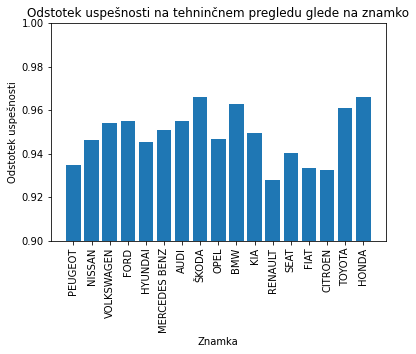

In [9]:
newDict = dict()
for brand, num in znamke.items():
    if num[0] + num[1] >= 10000:
        newDict.setdefault(brand, num)
znamke = newDict

seznamZnamk = []
odstotekZanesljivosti = []

for znamka, stevilo in znamke.items():
    seznamZnamk.append(znamka)
    odstotekZanesljivosti.append(stevilo[0]/(stevilo[0] + stevilo[1]))
    

graf = plt.bar(seznamZnamk, odstotekZanesljivosti)
plt.xticks(rotation=90)
plt.ylim(0.9,1)
plt.title("Odstotek uspešnosti na tehninčnem pregledu glede na znamko")
plt.xlabel("Znamka")
plt.ylabel("Odstotek uspešnosti")

Opazimo, da ne moremo dobiti zanesljivosti avtomobilskih znamk z odstotkom usprešnosti tehničnega pregleda. 


Poiskusimo še določiti zanesljivost na podlagi prevoženih kilometrov.
Zanesljivejše znamke, bi morale v povprečuju imeti več prevoženih kilometrov

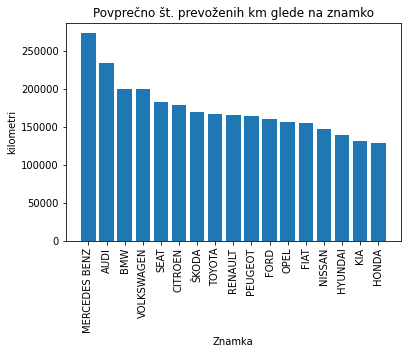

In [10]:
zanesljivostZnamk = dict()
with open('podatki/Porocilo_o_uspesnosti_tehnicnih_pregledov1.csv', encoding="utf8") as f:
    first = True;
    for line in f:
        if not first:
            splitted = line.split(";")
            for i in range(len(splitted)):
                splitted[i] = splitted[i].replace('"', '')
            if splitted[0] in znamke:  
                zanesljivostZnamk.setdefault(splitted[0], [0,0,0]) #[Število, vsota let, vsota kilometrov]
                if splitted[14] != "" and splitted[16] != "":
                    if int(splitted[16]) < 1000000:
                        zanesljivostZnamk[splitted[0]][0] += 1
                        zanesljivostZnamk[splitted[0]][1] += int(splitted[14].split(".")[2])
                        zanesljivostZnamk[splitted[0]][2] += int(splitted[16])
        else:
            first = False
            
for znamka, stevilo in zanesljivostZnamk.items():
    stevilo[1] /= stevilo[0]
    stevilo[2] /= stevilo[0]
    
avgKilometri = list()
avgZnamka = list()
avgMileage = dict()
for key, value in zanesljivostZnamk.items():
    avgMileage.setdefault(key, value[2])
while len(avgMileage) > 0:
    maxKey = max(avgMileage, key=avgMileage.get)
    avgZnamka.append(maxKey)
    avgKilometri.append(avgMileage[maxKey])
    avgMileage.pop(maxKey)

    
plt.bar(avgZnamka, avgKilometri)
plt.xticks(rotation=90)
plt.title("Povprečno št. prevoženih km glede na znamko")
plt.xlabel("Znamka")
plt.ylabel("kilometri")
plt.show()

Tudi tako ne moremo določiti zanesljivosti avtomobilov, lahko pa vidimo, katere znamke avtomobilov zdržijo dlje.
Opazimo tudi, da so rezulati zelo podobni pri avtomobilih iz iste družine proizvajalcev (Hyundai in Kia, Peugeot in Citroen...)

Od lokalnega mehanika sem slišal trditev, da kilometrina ni dober pokazatelj življenjske dobe avtomobile, saj se nekatere znamke avtomobilov (še posebej nemške) večinoma uporabljajo za opravljanje daljših relacij po avtocesti, zato imajo posledično več prevoženih kilometrov, avtomobil na avtocesti ni izpostavljen večjim obremenitvam.

Oglejmo si povprečno število prevoženih kolometrov 10 let starega avtomobila glede na znamko

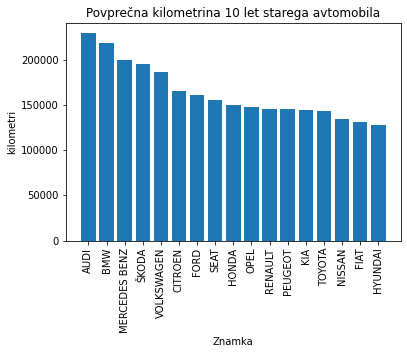

In [11]:
avgKilometrina = dict()
with open('podatki/Porocilo_o_uspesnosti_tehnicnih_pregledov1.csv', encoding="utf8") as f:
    first = True;
    for line in f:
        if not first:
            splitted = line.split(";")
            for i in range(len(splitted)):
                splitted[i] = splitted[i].replace('"', '')
            if splitted[14] != "" and splitted[14].split(".")[2] == "2010" and splitted[16] != "" and splitted[0] != "" and int(splitted[16]) < 1000000 and splitted[7] == "osebni avtomobil":
                avgKilometrina.setdefault(splitted[0],[0,0])
                avgKilometrina[splitted[0]][0] += 1
                avgKilometrina[splitted[0]][1] += int(splitted[16])
        else:
            first = False
avgKilometrina2 = dict()
for znamka in zanesljivostZnamk.keys():
    avgKilometrina2[znamka] = avgKilometrina[znamka][1] / avgKilometrina[znamka][0]

avgKilometri = list()
avgZnamka = list()
while len(avgKilometrina2) > 0:
    maxKey = max(avgKilometrina2, key=avgKilometrina2.get)
    avgZnamka.append(maxKey)
    avgKilometri.append(avgKilometrina2[maxKey])
    avgKilometrina2.pop(maxKey)

plt.bar(avgZnamka, avgKilometri)
plt.xticks(rotation=90)
plt.title("Povprečna kilometrina 10 let starega avtomobila")
plt.xlabel("Znamka")
plt.ylabel("kilometri")
plt.show()

Opazimo, da imajo v večini znamke nemških proizvajalcev več prevoženih kilometrov

Poglejmo si še povprečno število prevoženih kilometrov glede na tip goriva

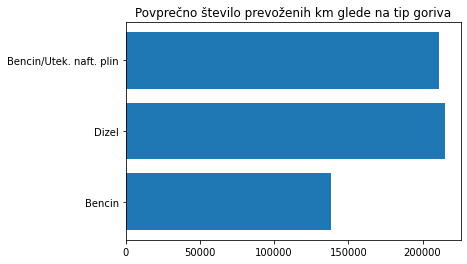

In [12]:
fuelType = dict()
with open('podatki/Porocilo_o_uspesnosti_tehnicnih_pregledov1.csv', encoding="utf8") as f:
    first = True;
    for line in f:
        if not first:
            splitted = line.split(";")
            for i in range(len(splitted)):
                splitted[i] = splitted[i].replace('"', '')
            if splitted[12] != "" and splitted[16] != "" and splitted[7] == "osebni avtomobil":
                fuelType.setdefault(splitted[12], [0,0])
                fuelType[splitted[12]][0] += 1
                fuelType[splitted[12]][1] += int(splitted[16])
        else:
            first = False
            
tip = []
stevilo = []

fuelType2 = dict()
for key, value in fuelType.items():
    if value[0] > 1000:
        fuelType2.setdefault(key, value[1] / value[0])
        tip.append(key)
        stevilo.append(fuelType2[key])
#print(fuelType2)


plt.barh(tip,stevilo)
plt.title("Povprečno število prevoženih km glede na tip goriva")
plt.show()

Avtomobili na dizel ter na LPG v povprečju prevozijo več kilometrov kot pa avtomobili z bencinskimi motorji

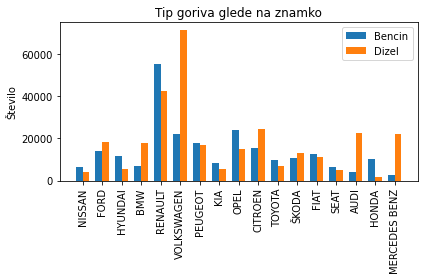

<Figure size 640x480 with 0 Axes>

In [13]:
dizelSt = dict()
bencinSt = dict()

with open('podatki/Porocilo_o_uspesnosti_tehnicnih_pregledov1.csv', encoding="utf8") as f:
    first = True;
    for line in f:
        if not first:
            splitted = line.split(";")
            for i in range(len(splitted)):
                splitted[i] = splitted[i].replace('"', '')
            if splitted[0] in znamke and splitted[12] == "Dizel" or splitted[12] == "Bencin":
                if splitted[12] == "Dizel":
                    dizelSt.setdefault(splitted[0], 0)
                    dizelSt[splitted[0]] += 1
                elif splitted[12] == "Bencin" and splitted[0] in znamke:
                    bencinSt.setdefault(splitted[0], 0)
                    bencinSt[splitted[0]] += 1
        else:
            first = False

#print(bencinSt)
#print(dizelSt)

bencinList = list()
dizelList = list()
znamkeList = list()

for key in bencinSt.keys():
    bencinList.append(bencinSt[key])
    dizelList.append(dizelSt[key])
    znamkeList.append(key)
    
#print(bencinList)
#print(dizelList)
#print(znamkeList)

width = 0.35
x = np.arange(len(znamkeList))

fig, ax = plt.subplots()
plt.xticks(rotation=90)
figure(figsize=(8, 6), dpi=80)

rects1 = ax.bar(x - width/2, bencinList, width, label='Bencin')
rects2 = ax.bar(x + width/2, dizelList, width, label='Dizel')
ax.set_ylabel('Število')
ax.set_title('Tip goriva glede na znamko')
ax.set_xticks(x)
ax.set_xticklabels(znamkeList)
ax.legend()

fig.tight_layout()



Vidimo, da pri avtomobilih nemških proizvajalcev prevladujejo dizelski motorji